In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/content/train_ctrUa4K.csv')
test=pd.read_csv('/content/test_lAUu6dG.csv')

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


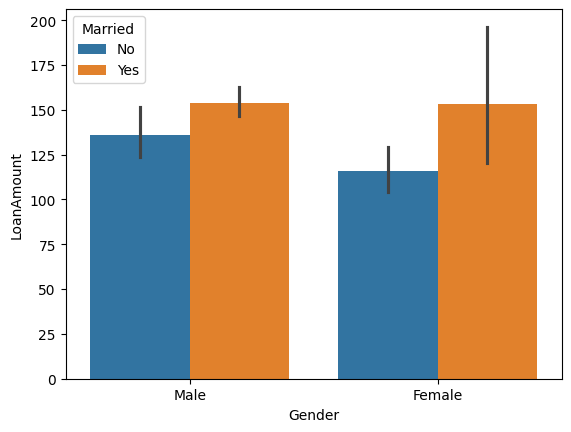

In [10]:
sns.barplot(x=train.Gender,y=train.LoanAmount,hue=train.Married)
plt.show()

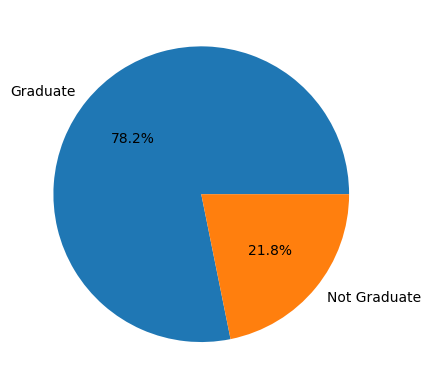

In [11]:
df1=train['Education'].value_counts()
plt.pie(df1,labels=df1.index,autopct='%1.1f%%')
plt.show()

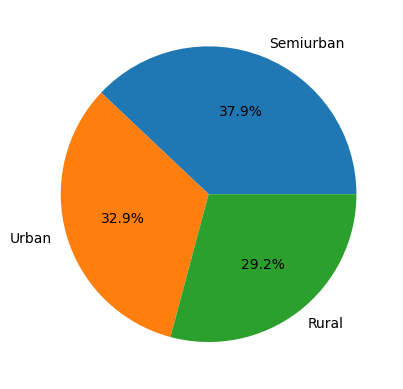

In [12]:
df1=train['Property_Area'].value_counts()
plt.pie(df1,labels=df1.index,autopct='%1.1f%%')
plt.show()

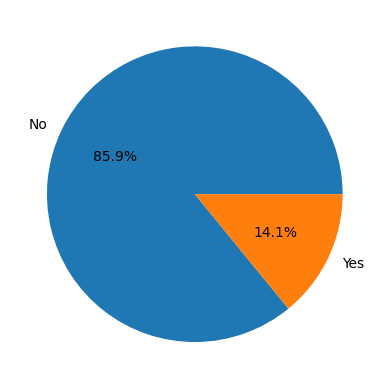

In [13]:
df1=train['Self_Employed'].value_counts()
plt.pie(df1,labels=df1.index,autopct='%1.1f%%')
plt.show()

In [15]:
train['Loan_ID'].nunique()


614

In [16]:
test['Loan_ID'].nunique()

367

In [17]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

In [18]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [20]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [22]:
for i in ['Gender','Married','Dependents','Self_Employed']:
    train[i]=train[i].fillna(train[i].mode()[0])

for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    print('Skewness value of column', i ,'=', train[i].skew())

Skewness value of column LoanAmount = 2.677551679256059
Skewness value of column Loan_Amount_Term = -2.362414124216269
Skewness value of column Credit_History = -1.8823610612186696


In [23]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train[i]=train[i].fillna(train[i].median())
for i in ['Gender','Dependents','Self_Employed']:
    test[i]=test[i].fillna(test[i].mode()[0])
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    print('Skewness value of column', i ,'=', test[i].skew())

Skewness value of column LoanAmount = 2.223512207498288
Skewness value of column Loan_Amount_Term = -2.679317770196837
Skewness value of column Credit_History = -1.722378503506142


In [24]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    test[i]=test[i].fillna(test[i].median())

In [25]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

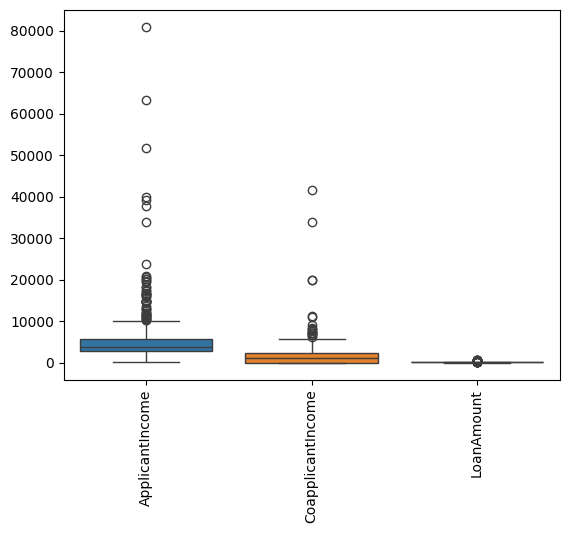

In [27]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [28]:
for i in ['ApplicantIncome','CoapplicantIncome']:
    print('Skewness value of column', i ,'=', train[i].skew())

Skewness value of column ApplicantIncome = 6.539513113994625
Skewness value of column CoapplicantIncome = 7.491531216657306


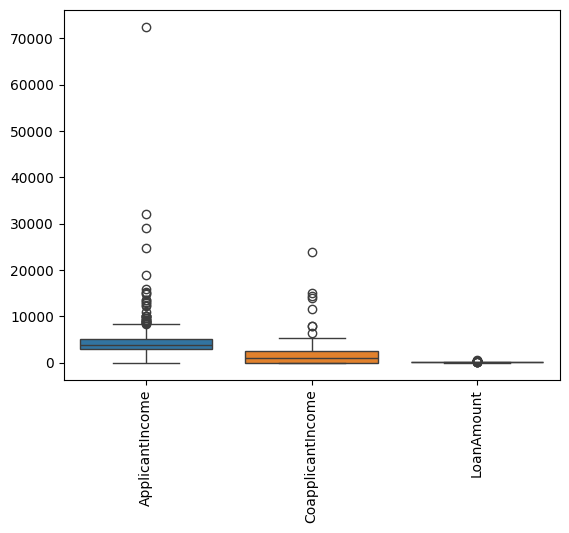

In [29]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [30]:
for i in ['ApplicantIncome','CoapplicantIncome']:
    print('Skewness value of column', i ,'=', test[i].skew())

Skewness value of column ApplicantIncome = 8.441374954190996
Skewness value of column CoapplicantIncome = 4.257356934477602


IQR

In [31]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(train[i],25,method='midpoint')
    Q3=np.percentile(train[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in train[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    train[i]=train[i].clip(lower=low_lim,upper=up_lim)

In [32]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(test[i],25,method='midpoint')
    Q3=np.percentile(test[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in test[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    test[i]=test[i].clip(lower=low_lim,upper=up_lim)

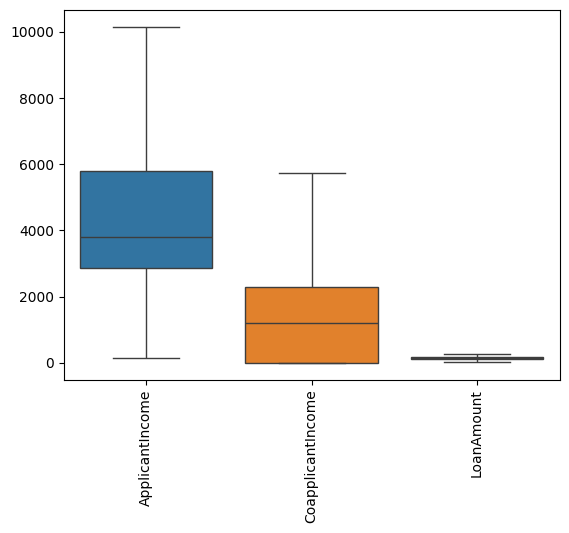

In [33]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

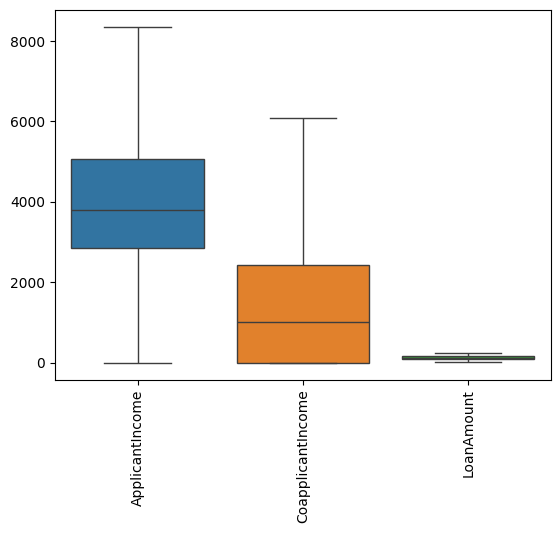

In [34]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

correlation


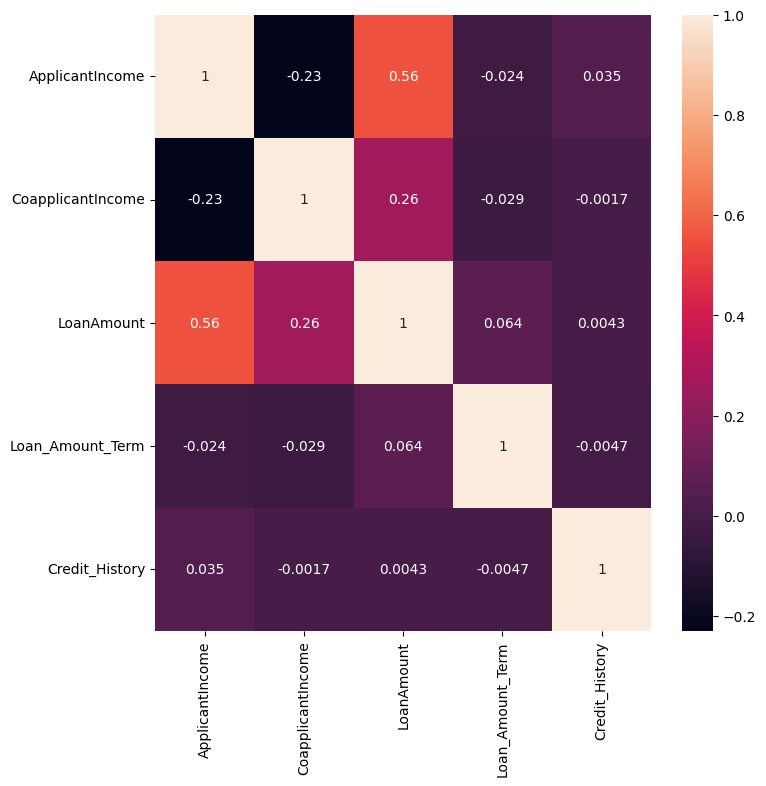

In [37]:
mat=train.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(8,8))
sns.heatmap(mat,annot=True)
plt.show()

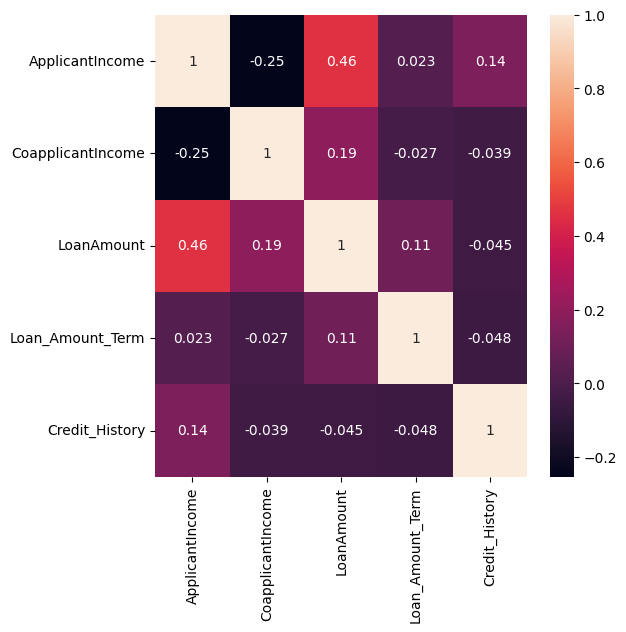

In [38]:
mat=test.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(6,6))
sns.heatmap(mat,annot=True)
plt.show()


In [39]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Loan_Status']:
    train[i]=le.fit_transform(train[i])

for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area']:
    test[i]=le.fit_transform(test[i])

In [40]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [41]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [42]:
log_reg=LogisticRegression()
log_reg.fit(x_train_sc,y_train)
log_reg_pred=log_reg.predict(x_train_sc)
print('Accuracy of Logistic Regression', accuracy_score(y_train,log_reg_pred))
print('Precision of Logistic Regression', precision_score(y_train,log_reg_pred))
print('Recall of Logistic Regression:',recall_score(y_train,log_reg_pred))
print('F1 score of Logistic Regression', f1_score(y_train,log_reg_pred))

Accuracy of Logistic Regression 0.814663951120163
Precision of Logistic Regression 0.7980997624703088
Recall of Logistic Regression: 0.9824561403508771
F1 score of Logistic Regression 0.8807339449541285


In [43]:
classifier=KNeighborsClassifier()
classifier.fit(x_train_sc,y_train)
knn_pred=classifier.predict(x_train_sc)
print('Accuracy of KNN Classifier', accuracy_score(y_train,knn_pred))
print('Precision of KNN Classifier', precision_score(y_train,knn_pred))
print('Recall of KNN Classifier:',recall_score(y_train,knn_pred))
print('F1 score of KNN Classifier', f1_score(y_train,knn_pred))

Accuracy of KNN Classifier 0.8289205702647657
Precision of KNN Classifier 0.8208955223880597
Recall of KNN Classifier: 0.9649122807017544
F1 score of KNN Classifier 0.8870967741935484


In [44]:
sv_clf=SVC()
sv_clf.fit(x_train_sc,y_train)
svm_pred=sv_clf.predict(x_train_sc)
print('Accuracy of SVM Classifier', accuracy_score(y_train,svm_pred))
print('Precision of SVM Classifier', precision_score(y_train,svm_pred))
print('Recall of SVM Classifier:',recall_score(y_train,svm_pred))
print('F1 score of SVM Classifier', f1_score(y_train,svm_pred))

Accuracy of SVM Classifier 0.8289205702647657
Precision of SVM Classifier 0.8115942028985508
Recall of SVM Classifier: 0.9824561403508771
F1 score of SVM Classifier 0.888888888888889


In [45]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train_sc,y_train)
dt_pred=dt_clf.predict(x_train_sc)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_train,dt_pred))
print('Precision of Decision Tree Classifier', precision_score(y_train,dt_pred))
print('Recall of Decision Tree Classifier:',recall_score(y_train,dt_pred))
print('F1 score of Decision Tree Classifier', f1_score(y_train,dt_pred))

Accuracy of Decision Tree Classifier 0.9979633401221996
Precision of Decision Tree Classifier 1.0
Recall of Decision Tree Classifier: 0.9970760233918129
F1 score of Decision Tree Classifier 0.9985358711566619


In [46]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_sc,y_train)
rf_pred=rf_clf.predict(x_train_sc)
print('Accuracy of Random Forest Classifier', accuracy_score(y_train,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_train,rf_pred))
print('Recall of Random Forest Classifier:',recall_score(y_train,rf_pred))
print('F1 score of Random Forest Classifier', f1_score(y_train,rf_pred))

Accuracy of Random Forest Classifier 0.9979633401221996
Precision of Random Forest Classifier 1.0
Recall of Random Forest Classifier: 0.9970760233918129
F1 score of Random Forest Classifier 0.9985358711566619


hyper parameter tuning


In [47]:
log_reg1=LogisticRegression(solver='liblinear')
log_reg1.fit(x_train_sc,y_train)
log_reg1_pred=log_reg.predict(x_train_sc)
log_reg1=LogisticRegression()
log_reg1.fit(x_train_sc,y_train)
log_reg1_pred=log_reg1.predict(x_train_sc)
print('Accuracy of Logistic Regression', accuracy_score(y_train,log_reg1_pred))
print('Precision of Logistic Regression', precision_score(y_train,log_reg1_pred))
print('Recall of Logistic Regression:',recall_score(y_train,log_reg1_pred))
print('F1 score of Logistic Regression', f1_score(y_train,log_reg1_pred))

Accuracy of Logistic Regression 0.814663951120163
Precision of Logistic Regression 0.7980997624703088
Recall of Logistic Regression: 0.9824561403508771
F1 score of Logistic Regression 0.8807339449541285


In [48]:
classifier1=KNeighborsClassifier(n_neighbors=3)
classifier1.fit(x_train_sc,y_train)
knn_pred1=classifier1.predict(x_train_sc)
print('Accuracy of KNN Classifier', accuracy_score(y_train,knn_pred1))
print('Precision of KNN Classifier', precision_score(y_train,knn_pred1))
print('Recall of KNN Classifier:',recall_score(y_train,knn_pred1))
print('F1 score of KNN Classifier', f1_score(y_train,knn_pred1))

Accuracy of KNN Classifier 0.8533604887983707
Precision of KNN Classifier 0.8534031413612565
Recall of KNN Classifier: 0.9532163742690059
F1 score of KNN Classifier 0.9005524861878452


In [51]:
sv_clf1=SVC(C=10,gamma=0.0001,kernel='linear')
sv_clf1.fit(x_train_sc,y_train)
svm_pred1=sv_clf1.predict(x_train_sc)
print('Accuracy of SVM Classifier', accuracy_score(y_train,svm_pred1))
print('Precision of SVM Classifier', precision_score(y_train,svm_pred1))
print('Recall of SVM Classifier:',recall_score(y_train,svm_pred1))
print('F1 score of SVM Classifier', f1_score(y_train,svm_pred1))

Accuracy of SVM Classifier 0.814663951120163
Precision of SVM Classifier 0.7980997624703088
Recall of SVM Classifier: 0.9824561403508771
F1 score of SVM Classifier 0.8807339449541285


In [52]:
dt_clf1=DecisionTreeClassifier(max_depth=20,criterion='entropy',min_samples_leaf=3)
dt_clf1.fit(x_train_sc,y_train)
dt_pred1=dt_clf1.predict(x_train_sc)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_train,dt_pred1))
print('Precision of Decision Tree Classifier', precision_score(y_train,dt_pred1))
print('Recall of Decision Tree Classifier:',recall_score(y_train,dt_pred1))
print('F1 score of Decision Tree Classifier', f1_score(y_train,dt_pred1))

Accuracy of Decision Tree Classifier 0.9185336048879837
Precision of Decision Tree Classifier 0.9467455621301775
Recall of Decision Tree Classifier: 0.935672514619883
F1 score of Decision Tree Classifier 0.9411764705882353


In [53]:
rf_clf1=RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =42)
rf_clf1.fit(x_train_sc,y_train)
rf_pred1=rf_clf1.predict(x_train_sc)
print('Accuracy of Random Forest Classifier', accuracy_score(y_train,rf_pred1))
print('Precision of Random Forest Classifier', precision_score(y_train,rf_pred1))
print('Recall of Random Forest Classifier:',recall_score(y_train,rf_pred1))
print('F1 score of Random Forest Classifier', f1_score(y_train,rf_pred1))

Accuracy of Random Forest Classifier 0.9694501018329938
Precision of Random Forest Classifier 0.9711815561959655
Recall of Random Forest Classifier: 0.9853801169590644
F1 score of Random Forest Classifier 0.9782293178519594


In [54]:
x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']
x_test=test

In [55]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(test)

In [56]:
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [57]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')
sample['Loan_Status']=rf_pred
sample['Loan_Status'] = sample['Loan_Status'].map({1: 'Y', 0: 'N'})
sample.to_csv('sample_random_forest.csv',index=False)
df=pd.read_csv('sample_random_forest.csv')
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
